<div align="center">
    <h1>In The Name Of GOD</h1>
</div>

# Self Organizing Map (SOM) implementation in Python with the SUSI package on RCV1 dataset

## Imports

In [37]:
import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix,plot_estimation_map,plot_som_histogram
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_rcv1
from joblib import effective_n_jobs
from numpy.ma.core import ceil 
import pickle as pkl
import pprint
import itertools

## Fetch the RCV1 dataset

In [6]:
rcv1 = fetch_rcv1()

data, target = rcv1.data, rcv1.target

(data, target)

(<804414x47236 sparse matrix of type '<class 'numpy.float64'>'
 	with 60915113 stored elements in Compressed Sparse Row format>,
 <804414x103 sparse matrix of type '<class 'numpy.uint8'>'
 	with 2606875 stored elements in Compressed Sparse Row format>)

## Hyperparameter

In [13]:
NUM_SAMPLES = 10000 # number of samples to use
NUM_NEURONS = (5 * np.sqrt(NUM_SAMPLES)) #number of neurons in the SOM rectangular grid
GRID_SIZE = (ceil(np.sqrt(NUM_NEURONS)).astype(np.int32), ceil(np.sqrt(NUM_NEURONS)).astype(np.int32)) #size of the grid
NUM_ITERS = 3000 #number of iterations to run the SOM
BETA0 = 0.5 #initial learning rate
N_JOBS = effective_n_jobs() #number of jobs to run in parallel

## Resample the dataset

In [9]:
X, y = resample(rcv1.data, rcv1.target, replace=False, n_samples=NUM_SAMPLES, random_state=42)

X = X.toarray()
Y = y.toarray()

## Setup the SOM Model

In [14]:
som = susi.SOMClustering(
    n_rows=GRID_SIZE[0],
    n_columns=GRID_SIZE[1],
    learning_rate_start=BETA0,
    n_jobs=N_JOBS,
    verbose=True)

## Train the SOM Model

In [15]:
som.fit(X)
print("[+] SOM fitting finished")

unsuper: 100%|██████████████████████████████████████████████████| 1000/1000 [02:54<00:00,  5.74it/s]
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    9.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   13.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   21.0s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   28.8s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   38.8s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:   51.1s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  2.7min
[Parall

[+] SOM fitting finished


[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:  3.2min finished


## Save&Load the SOM Model

### Save the SOM Model

In [20]:
with open('model/som_package.pkl', 'wb') as f: #save the SOM
    pkl.dump(som, f)
    pprint.pprint(f'[+] SOM saved to model/som_package.pkl')

'[+] SOM saved to model/som_package.pkl'


### Load the SOM Model

In [21]:
with open('model/som_package.pkl', 'rb') as f: #load the SOM
    som = pkl.load(f)
    pprint.pprint(f'[+] SOM loaded from model/som_package.pkl')

'[+] SOM loaded from model/som_package.pkl'


## Best Matching Unit (BMU)

In [23]:
best_matching_units_list = som.get_bmus(X) #get the best matching units for each sample

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   16.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   34.0s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   58.9s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  6.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  7.2min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  8.6min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 10.1min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 11.7min
[Parallel(n_jobs=10)]: Done 10000 out of 1000

## Save&Load the BMU

### Save the BMU

In [47]:
with open('model/BMU/bmu_list_Package.pkl', 'wb') as f:
    pkl.dump(best_matching_units_list, f)
    pprint.pprint(f'[+] best_matching_units_list saved to model/BMU/bmu_list_Package.pkl')

'[+] best_matching_units_list saved to model/BMU/bmu_list_Package.pkl'


### Load the BMU

In [48]:
with open('model/BMU/bmu_list_Package.pkl', 'rb') as f:
    best_matching_units_list = pkl.load(f)
    pprint.pprint(f'[+] best_matching_units_list loaded from model/BMU/bmu_list_Package.pkl')

'[+] best_matching_units_list loaded from model/BMU/bmu_list_Package.pkl'


## Visualize the SOM Model

## U-Matrix

In [28]:
u_matrix = som.get_u_matrix() #get the U-matrix of the SOM

## Data points from each neuron in the SOM Model

In [31]:
s = np.zeros(GRID_SIZE) #initialize the s vector
for i, j in itertools.product(range(GRID_SIZE[0]), range(GRID_SIZE[1])): #for each neuron in the SOM
    s[i][j] = len(som.get_datapoints_from_node([i,j]))

## See Min&Max number of data points for each neuron in the SOM Model

In [33]:
(np.amax(s), np.amin(s))

(144.0, 0.0)

## check the number of data points for each neuron in the SOM Model

In [34]:
flat=s.flatten()
flat.sort()

flat

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
         2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   3.,   3.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   4.,   4.,   

## Plot the U-Matrix

<AxesSubplot:xlabel='SOM columns', ylabel='SOM rows'>

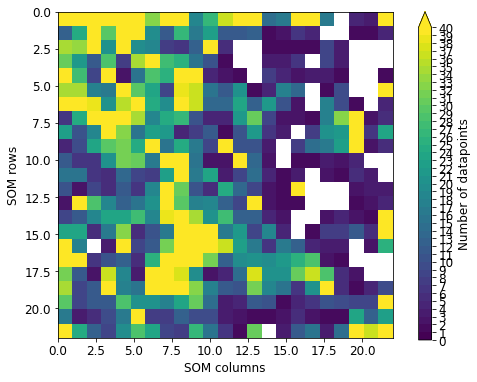

In [49]:
plot_som_histogram(bmu_list=best_matching_units_list,n_rows=GRID_SIZE[0],n_columns=GRID_SIZE[1],n_datapoints_cbar=40,fontsize=12)

## Plot Distance Matrix

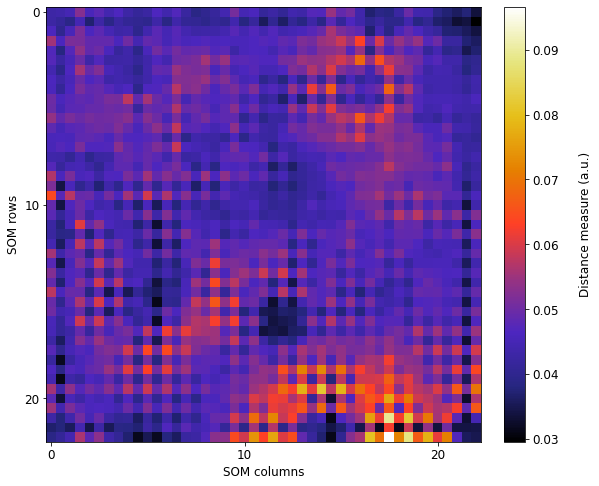

In [50]:
u_matrix = som.get_u_matrix()
cmap="CMRmap"
n_rows=GRID_SIZE[0]
n_colums=GRID_SIZE[1]
fontsize=12
_, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(u_matrix.squeeze(), cmap=cmap)
ax.set_xticks(np.arange(0, n_colums * 2 + 1, 20))
ax.set_xticklabels(np.arange(0, n_colums + 1, 10))
ax.set_yticks(np.arange(0, n_rows * 2 + 1, 20))
ax.set_yticklabels(np.arange(0, n_rows + 1, 10))

# ticks and labels
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
ax.set_ylabel("SOM rows", fontsize=fontsize)
ax.set_xlabel("SOM columns", fontsize=fontsize)

# colorbar
cbar = plt.colorbar(img, ax=ax, fraction=0.04, pad=0.04)
cbar.ax.set_ylabel(
    "Distance measure (a.u.)", rotation=90, fontsize=fontsize, labelpad=20
)
cbar.ax.tick_params(labelsize=fontsize)